1. Konversi Data menjadi Data Frame 

In [3]:
import pandas as pd 

df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


2. Preprocessing

In [5]:
# ubah nama kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

In [6]:
# ubah data kategorik mmenjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

In [7]:
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


3. Drop Cust and Gender cause it irrelevant

In [8]:
# menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)

4. Latih model K-Means

In [9]:
from sklearn.cluster import KMeans

In [10]:
#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

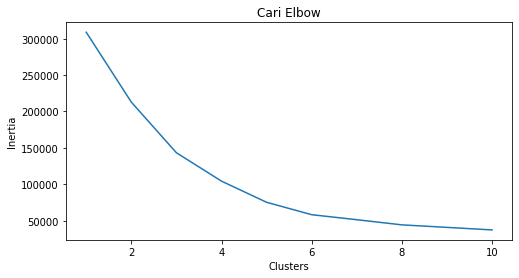

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#making inertia plot 
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

5. Plot Hasil Pengklasteran

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


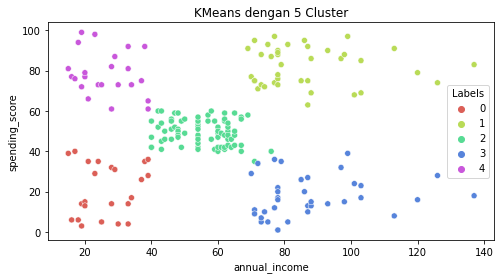

In [13]:
#making object in K-Means
km5 = KMeans(n_clusters=5).fit(X)

#adding table column
X['Labels'] = km5.labels_

#making plot KMeans with 5 cluster
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()